In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import xarray as xr
topoMap = topoMap.assign_coords({'x':topoMap.x + rasterYMin, 'y':topoMap.y + rasterXMin})
reshaped_array = topoMap.transpose('y', 'x' , 'band')

fig = go.Figure((px.imshow(
    img=reshaped_array,

)))
fig.show()

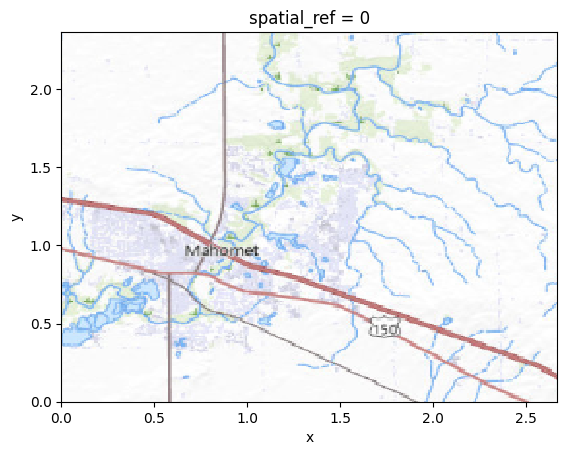

In [9]:
usgstopo = r"https://basemap.nationalmap.gov/arcgis/services/USGSTopo/MapServer/WMSServer?request=GetCapabilities&service=WMS"
from owslib.wms import WebMapService
from io import BytesIO
import rioxarray as rxr

wms = WebMapService(usgstopo)
#[print(k, wms.contents[k].title) for k in wms.contents]
layer_name = wms.contents['0'].title

rasterXMin = -9844514
rasterYMin = 4889556
rasterXMax = -9830630
rasterYMax = 4901909

bbox = (rasterXMin, rasterYMin, rasterXMax, rasterYMax)

img = wms.getmap(
    layers='0',
    srs='EPSG:3857',
    bbox=bbox,
    size=(256, 256),
    format='image/tiff',
    transparent=True
    )
bio = BytesIO(img.read())
topoMap = rxr.open_rasterio(bio)
#topoMap.x = topoMap.x + rasterXMin
#topoMap.y = topoMap.y + rasterYMin
#topoMap[0]
#topoMap[0].plot(cmap='Blues')
topoMap.plot.imshow(rgb='band')
